<a href="https://colab.research.google.com/github/aminabeshr/cnn-model/blob/main/LSTM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip 'UCI HAR Dataset.zip'


--2025-03-20 04:08:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [       <=>          ]  58.17M  44.2MB/s    in 1.3s    

2025-03-20 04:08:55 (44.2 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

In [4]:

def load_data():
    INPUT_PATH = 'UCI HAR Dataset/'
    features = np.loadtxt(INPUT_PATH + 'features.txt', dtype=str)[:, 1]


    X_train = np.loadtxt(INPUT_PATH + 'train/X_train.txt')
    y_train = np.loadtxt(INPUT_PATH + 'train/y_train.txt')


    X_test = np.loadtxt(INPUT_PATH + 'test/X_test.txt')
    y_test = np.loadtxt(INPUT_PATH + 'test/y_test.txt')

    return X_train, y_train, X_test, y_test, features

X_train, y_train, X_test, y_test, feature_names = load_data()

print(f"شكل بيانات التدريب: {X_train.shape}, عدد الفئات: {len(np.unique(y_train))}")


شكل بيانات التدريب: (7352, 561), عدد الفئات: 6


In [5]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(f"الشكل بعد المعالجة - X_train: {X_train.shape}, y_train: {y_train.shape}")


الشكل بعد المعالجة - X_train: (7352, 561, 1), y_train: (7352, 6)


In [6]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout

In [7]:
model = Sequential([

    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),


    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),


    LSTM(128, return_sequences=True),
    Dropout(0.5),


    LSTM(64),
    Dropout(0.5),


    Dense(128, activation='relu'),
    Dropout(0.5),


    Dense(y_train.shape[1], activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 557, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 557, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 278, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 276, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 276, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 138, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 138, 128)            │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 138, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,486 (1.36 MB)

 Trainable params: 355,718 (1.36 MB)

 Non-trainable params: 768 (3.00 KB)

In [9]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 155s 643ms/step - accuracy: 0.4226 - loss: 1.2130 - val_accuracy: 0.3695 - val_loss: 1.3372
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 206s 661ms/step - accuracy: 0.6696 - loss: 0.6799 - val_accuracy: 0.7136 - val_loss: 0.6823
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 200s 653ms/step - accuracy: 0.7549 - loss: 0.4862 - val_accuracy: 0.7917 - val_loss: 0.4639
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 203s 657ms/step - accuracy: 0.8010 - loss: 0.4186 - val_accuracy: 0.8432 - val_loss: 0.3737
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 204s 667ms/step - accuracy: 0.8350 - loss: 0.3635 - val_accuracy: 0.8157 - val_loss: 0.5009
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 200s 660ms/step - accuracy: 0.8685 - loss: 0.2971 - val_accuracy: 0.8683 - val_loss: 0.3353
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 151s 656ms/step - accuracy: 0.9031 - loss: 0.2529 - val_accuracy: 0.8836 - val_loss: 0.3025
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 194s 623ms/step - accuracy: 0.9170 -

In [10]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"دقة النموذج على بيانات الاختبار: {accuracy * 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.8466 - loss: 0.4313
دقة النموذج على بيانات الاختبار: 86.12%


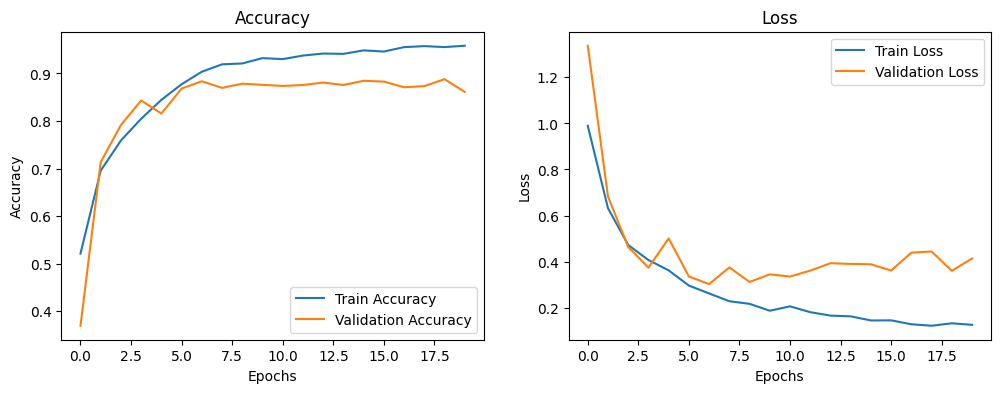

In [11]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:

sample_index = np.random.randint(0, X_test.shape[0])
sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)
true_label = np.argmax(y_test[sample_index])


prediction = np.argmax(model.predict(sample))

print(f"التسمية الحقيقية: {true_label}, التسمية المتوقعة: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
التسمية الحقيقية: 4, التسمية المتوقعة: 4


In [18]:
# حفظ النموذج
model.save("cnn_lstm_har_model.h5")
print("تم حفظ النموذج بنجاح!")


تم حفظ النموذج بنجاح!


In [19]:
import numpy as np


sample_index = np.random.randint(0, X_test.shape[0])


sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)
true_label = np.argmax(y_test[sample_index])


predicted_probabilities = model.predict(sample)
predicted_label = np.argmax(predicted_probabilities)


print("=" * 50)
print(f"✅ التسمية الحقيقية: {true_label}")
print(f"🤖 التسمية المتوقعة: {predicted_label}")
print("=" * 50)


for i, prob in enumerate(predicted_probabilities[0]):
    print(f"🔹 فئة {i}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
✅ التسمية الحقيقية: 5
🤖 التسمية المتوقعة: 5
🔹 فئة 0: 0.0000
🔹 فئة 1: 0.0000
🔹 فئة 2: 0.0000
🔹 فئة 3: 0.0000
🔹 فئة 4: 0.0000
🔹 فئة 5: 1.0000
